## Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

ImportError: DLL load failed while importing _multiarray_umath: No se puede encontrar el módulo especificado.

## Leer los ficheros de datos

In [48]:
# Definir la ruta base de datos
data_path = Path("..") / "data"

# Leer los archivos con rutas relativas
df_DIV = pd.read_csv(data_path / 'IKZ2_DIV_02.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_B   = pd.read_csv(data_path / 'IKZ2_LIV_LEDBlanco_10mW_01.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_M   = pd.read_csv(data_path / 'IKZ2_LIV_LEDMagenta_10mW_01.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_R   = pd.read_csv(data_path / 'IKZ2_LIV_LEDRojo_10mW_01.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_V   = pd.read_csv(data_path / 'IKZ2_LIV_LEDVerde_10mW_01.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_A   = pd.read_csv(data_path / 'IKZ2_LIV_LEDAzul_10mW_01.txt', sep='\t', decimal='.', skiprows=21, encoding='latin1')
df_Ir  = pd.read_csv(data_path / 'IKZ2_LIV_LEDInfrarrojo_10mW_01.txt', sep='\t', decimal='.', skiprows=19, encoding='latin1')
df_Sol = pd.read_csv(data_path / 'LIV_1_01.txt', sep='\t', decimal='.', skiprows=1, encoding='latin1') 
df_Sol_D = pd.read_csv(data_path / 'DIV_1_01.txt', sep='\t', decimal='.', skiprows=1, encoding='latin1') 


### Editar datos SimSol

In [5]:
df_Sol = df_Sol.rename(columns={'Ewe/V vs. SCE':'V1','<I>/mA':'I1'})
df_Sol_D = df_Sol_D.rename(columns={'Ewe/V vs. SCE':'V1','<I>/mA':'I1'})

In [6]:
df_Sol['I1'] = df_Sol['I1']/1000
df_Sol_D['I1'] = df_Sol_D['I1']/1000

In [7]:
area = 4
df_Sol['J(A/cm2)'] = df_Sol['I1']/area
df_Sol_D['J(A/cm2)'] = df_Sol_D['I1']/area

In [8]:
df_filt_sol = df_Sol[(-df_Sol['I1'] >=-0.01) & (df_Sol['V1']>=-0.005)]

In [9]:
df_filt_sol['dV'] = df_filt_sol['V1'].diff()

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\3970381164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_sol['dV'] = df_filt_sol['V1'].diff()


In [10]:
df_filt_sol_1 = df_filt_sol[df_filt_sol['dV']<=0]

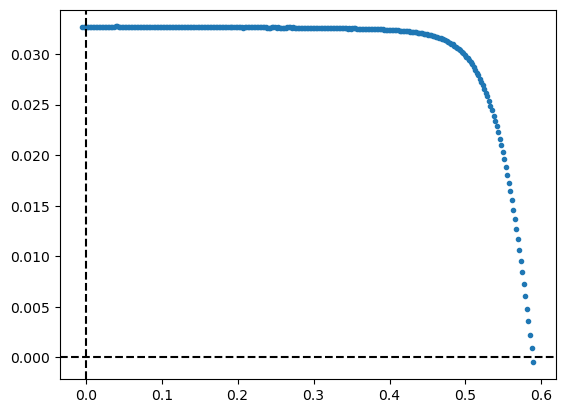

In [11]:
plt.plot(df_filt_sol_1['V1'],-df_filt_sol_1['J(A/cm2)'],'.')
plt.axhline(0, color='k', ls = '--')
plt.axvline(0, color='k', ls = '--')

In [12]:
df_filt_sol['Potencia'] = -df_filt_sol['J(A/cm2)'] * df_filt_sol['V1']
df_filt_sol_1['Potencia'] = -df_filt_sol_1['J(A/cm2)']*df_filt_sol_1['V1']

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2645495240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_sol['Potencia'] = -df_filt_sol['J(A/cm2)'] * df_filt_sol['V1']
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2645495240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_sol_1['Potencia'] = -df_filt_sol_1['J(A/cm2)']*df_filt_sol_1['V1']


## Calculamos la densidad de corriente J por cm^2

In [13]:
# Diccionarios con los df
datasets = {
    'Dark': df_DIV,
    'Azul': df_A,
    'Blanco': df_B,
    'Verde': df_V,
    'Magenta': df_M,
    'Rojo': df_R,
    'Infrarrojo': df_Ir
}

# Diccionario de colores
colores_led = {
    'D': 'black',
    'A': 'blue',
    'B': 'gray',
    'V': 'green',
    'M': 'magenta',
    'R': 'red',
    'Ir': 'brown'
}

In [14]:
# Introducimos el área de la célula
area_cell = 4 # en cm^2

for key, df in datasets.items():
    df['J(A/cm2)'] = df['I1']/area_cell

## Representar las curvas IV en escala semi logaritmica y en valor absoluto

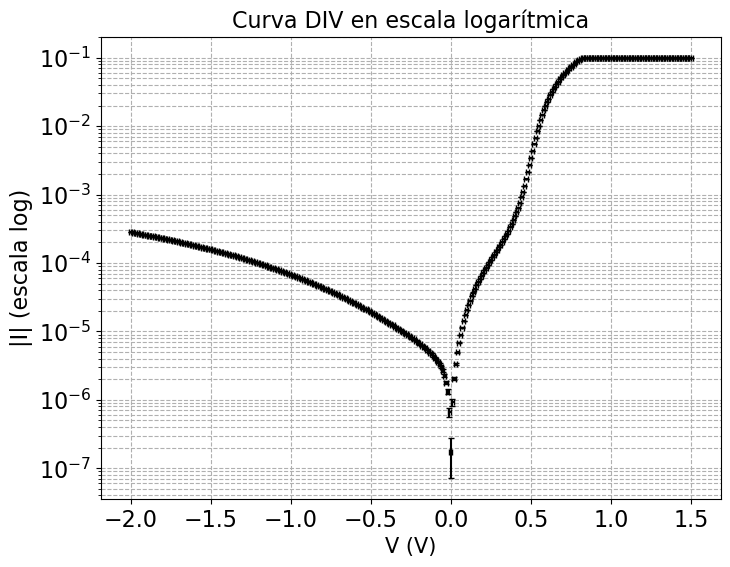

In [15]:

# Asegúrate de reemplazar 'I1' y 'V1' con los nombres exactos de las columnas si son distintos
df_DIV['I1_abs'] = np.abs(df_DIV['I1'])  # Calcular el valor absoluto de I1
df_B['I1_abs'] = np.abs(df_B['I1'])  # Calcular el valor absoluto de I1
df_M['I1_abs'] = np.abs(df_M['I1'])  # Calcular el valor absoluto de I1
df_R['I1_abs'] = np.abs(df_R['I1'])  # Calcular el valor absoluto de I1
df_V['I1_abs'] = np.abs(df_V['I1'])  # Calcular el valor absoluto de I1
df_A['I1_abs'] = np.abs(df_A['I1'])  
df_Ir['I1_abs'] = np.abs(df_Ir['I1']) 
df_Sol_D['I1_abs'] = np.abs(df_Sol_D['I1'])

# Errores
errI = 1e-7
errV = 0.01

# Crear la figura y el gráfico
plt.figure(figsize=(8, 6))

plt.errorbar(df_DIV['V1'],df_DIV['I1_abs'],xerr=errV,yerr=errI,marker='.',markersize = 1,linestyle = ' ',color = 'k', capsize=2, capthick=1)
# plt.plot(df_DIV['V1'], df_DIV['I1_abs'], marker='o',markersize = 1, linestyle=' ', color='k')
""" plt.plot(df_B['V1'], df_B['I1_abs'], marker='o', markersize = 1, linestyle='-', color='y')
plt.plot(df_M['V1'], df_M['I1_abs'], marker='o', markersize = 1, linestyle='-', color='purple')
plt.plot(df_R['V1'], df_R['I1_abs'], marker='o', markersize = 1, linestyle='-', color='r')
plt.plot(df_V['V1'], df_V['I1_abs'], marker='o', markersize = 1,linestyle='-', color='g')
plt.plot(df_A['V1'], df_A['I1_abs'], marker='o', markersize = 1,linestyle='-', color='b')
plt.plot(df_Ir['V1'], df_Ir['I1_abs'], marker='o', markersize = 1,linestyle='-', color='brown')
 """

# Configurar los ejes
plt.yscale('log')  # Escala logarítmica en el eje y (I1)
plt.xlabel('V (V)',fontsize=15)
plt.ylabel('|I| (escala log)',fontsize = 16)
plt.title('Curva DIV en escala logarítmica',fontsize = 16)

# Mostrar la gráfica
#plt.legend(['LED_Blanco','LED_Magenta','LED_Rojo','LED_Verde','LED_Azul','LED_Infrarrojo'])
plt.grid(True, which="both", ls="--")  # Líneas de la cuadrícula para facilitar la lectura
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


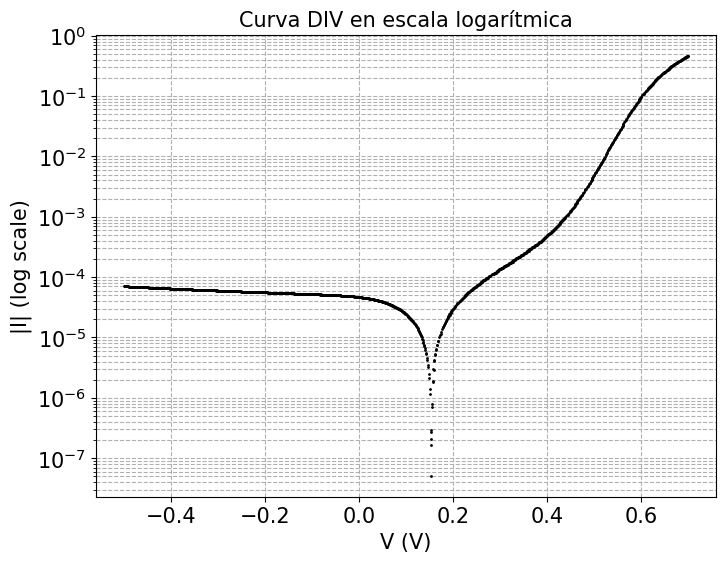

In [16]:
# Crear la figura y el gráfico
plt.figure(figsize=(8, 6))
plt.plot(df_Sol_D['V1'], df_Sol_D['I1_abs'], marker='o',markersize = 1, linestyle=' ', color='k')
""" plt.plot(df_B['V1'], df_B['I1_abs'], marker='o', markersize = 1, linestyle='-', color='y')
plt.plot(df_M['V1'], df_M['I1_abs'], marker='o', markersize = 1, linestyle='-', color='purple')
plt.plot(df_R['V1'], df_R['I1_abs'], marker='o', markersize = 1, linestyle='-', color='r')
plt.plot(df_V['V1'], df_V['I1_abs'], marker='o', markersize = 1,linestyle='-', color='g')
plt.plot(df_A['V1'], df_A['I1_abs'], marker='o', markersize = 1,linestyle='-', color='b')
plt.plot(df_Ir['V1'], df_Ir['I1_abs'], marker='o', markersize = 1,linestyle='-', color='brown')
 """

# Configurar los ejes
plt.yscale('log')  # Escala logarítmica en el eje y (I1)
plt.xlabel('V (V)',fontsize=15)
plt.ylabel('|I| (log scale)',fontsize = 15)
plt.title('Curva DIV en escala logarítmica',fontsize = 15)

# Mostrar la gráfica
#plt.legend(['LED_Blanco','LED_Magenta','LED_Rojo','LED_Verde','LED_Azul','LED_Infrarrojo'])
plt.grid(True, which="both", ls="--")  # Líneas de la cuadrícula para facilitar la lectura
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## Representar la curva IV de la forma -I vs V para el cálculo de la potencia

In [17]:
# Calculamos una columna para -I1
df_V['-I1'] = -df_V['I1']
df_M['-I1'] = -df_M['I1']
df_B['-I1'] = -df_B['I1']
df_A['-I1'] = -df_A['I1']
df_R['-I1'] = -df_R['I1']
df_DIV['-I1'] = -df_DIV['I1']
df_Ir['-I1'] = -df_Ir['I1']

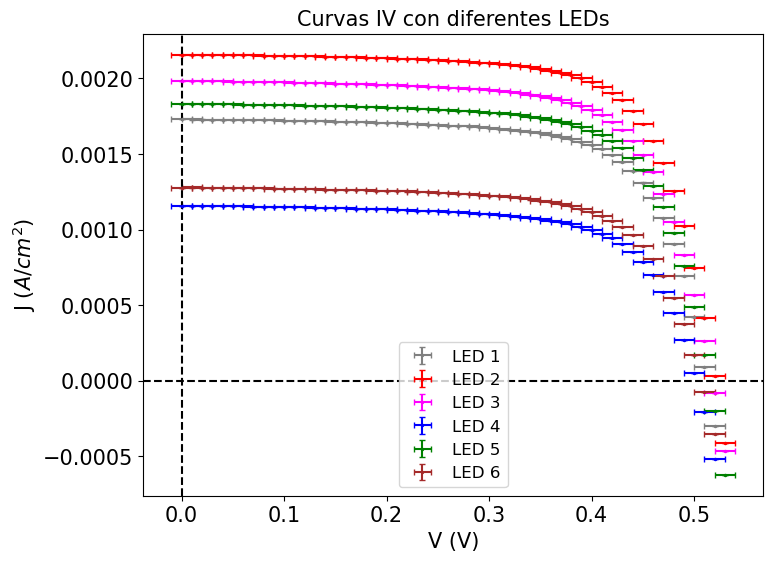

In [18]:
plt.figure(figsize=(8,6))

df_filtrado_V = df_V[(-df_V['I1'] >=-0.0025) & (df_V['V1']>=-0.0025)]
df_filtrado_DIV = df_DIV[(-df_DIV['I1'] >= -0.0025)& (df_DIV['V1']>=-0.0025)]
df_filtrado_R = df_R[(-df_R['I1'] >=-0.0025)& (df_R['V1']>=-0.0025)]
df_filtrado_M = df_M[(-df_M['I1'] >=-0.0025)& (df_M['V1']>=-0.0025)]
df_filtrado_B = df_B[(-df_B['I1'] >=-0.0025)& (df_B['V1']>=-0.0025)]
df_filtrado_A = df_A[(-df_A['I1'] >=-0.0025)& (df_A['V1']>=-0.0025)]
df_filtrado_Ir = df_Ir[(-df_Ir['I1'] >=-0.0025)& (df_Ir['V1']>=-0.0025)]

# Errores
errI = 1e-7
errV = 0.01

errV_sol = 1e-6
errI_sol = 1e-4

#plt.errorbar(df_filtrado_DIV['V1'], -df_filtrado_DIV['J(A/cm^2)'], marker='o',markersize = 3, linestyle=' ', color='k')
plt.errorbar(df_filtrado_B['V1'], -df_filtrado_B['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3, linestyle=' ', color='gray', capsize=2, capthick=1,label= 'LED 1')
plt.errorbar(df_filtrado_R['V1'], -df_filtrado_R['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3, linestyle=' ', color='r', capsize=2, capthick=1,label= 'LED 2')
plt.errorbar(df_filtrado_M['V1'], -df_filtrado_M['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3, linestyle=' ', color='magenta', capsize=2, capthick=1,label= 'LED 3')
plt.errorbar(df_filtrado_A['V1'], -df_filtrado_A['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3,linestyle=' ', color='b', capsize=2, capthick=1,label= 'LED 4')
plt.errorbar(df_filtrado_V['V1'], -df_filtrado_V['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3,linestyle=' ', color='g', capsize=2, capthick=1,label= 'LED 5')

plt.errorbar(df_filtrado_Ir['V1'], -df_filtrado_Ir['J(A/cm2)'],xerr=errV,yerr=errI, marker='.', markersize = 3,linestyle=' ', color='brown', capsize=2, capthick=1,label= 'LED 6')

plt.axhline(0, color='k', ls = '--')
plt.axvline(0, color='k', ls = '--')

plt.title(r'Curvas IV con diferentes LEDs',fontsize=15)
plt.xlabel('V (V)',fontsize=15)
plt.ylabel(r'J ($A/cm^2$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
# Mostrar la gráfica
plt.legend(loc = 'best',fontsize = 12)



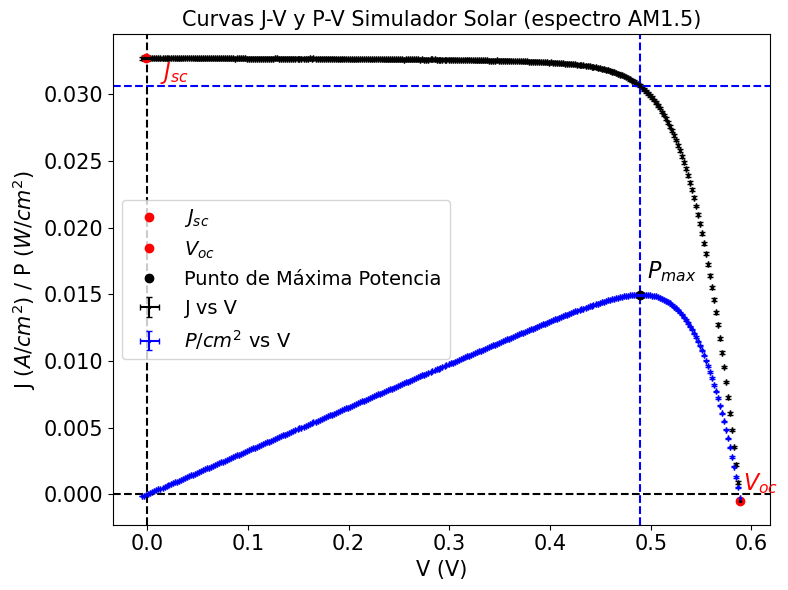

In [19]:
# errP_Sol = abs(errV_sol * df_filt_sol_1['J(A/cm2)'])+abs(errI_sol * df_filt_sol_1['V1'])

# plt.figure(figsize=(8,6))

# errV_sol = 1e-6
# errI_sol = 1e-4
# plt.errorbar(df_filt_sol_1['V1'], -df_filt_sol_1['J(A/cm2)'],xerr=errV_sol,yerr=errI_sol, marker='.', markersize = 3,linestyle=' ', color='k', capsize=2, capthick=1,label='J vs V')
# plt.errorbar(df_filt_sol_1['V1'],df_filt_sol_1['Potencia'],xerr = errV_sol, yerr=errP_Sol,marker='.', markersize = 3,linestyle=' ', color='b', capsize=2, capthick=1, label=r'$P/cm^2$ vs V')
# plt.axhline(0, color='k', ls = '--')
# plt.axvline(0, color='k', ls = '--')

# plt.title(r'Curvas J-V y P-V Simulador Solar (espectro AM1.5)',fontsize=15)
# plt.xlabel('V (V)',fontsize=15)
# plt.ylabel(r'J ($A/cm^2$) / P ($W/cm^2$)',fontsize=15)
# plt.tick_params(axis='both', which='major', labelsize=15)
# plt.legend(loc = 'center left',fontsize = 15)

import matplotlib.pyplot as plt
import numpy as np

# Errores definidos
errV_sol = 1e-6
errI_sol = 1e-4

# Error de potencia
errP_Sol = abs(errV_sol * df_filt_sol_1['J(A/cm2)']) + abs(errI_sol * df_filt_sol_1['V1'])

# Calcular Isc: corriente cuando V ≈ 0
idx_Isc = df_filt_sol_1['V1'].abs().idxmin()
Isc = -df_filt_sol_1.loc[idx_Isc, 'J(A/cm2)']
V_Isc = df_filt_sol_1.loc[idx_Isc, 'V1']

# Calcular Voc: voltaje cuando J ≈ 0
idx_Voc = df_filt_sol_1['J(A/cm2)'].abs().idxmin()
Voc = df_filt_sol_1.loc[idx_Voc, 'V1']
J_Voc = -df_filt_sol_1.loc[idx_Voc, 'J(A/cm2)']

# Punto de máxima potencia
idx_Pmax = df_filt_sol_1['Potencia'].idxmax()
V_mpp = df_filt_sol_1.loc[idx_Pmax, 'V1']
J_mpp = -df_filt_sol_1.loc[idx_Pmax, 'J(A/cm2)']
P_mpp = df_filt_sol_1.loc[idx_Pmax, 'Potencia']

# Gráfico
plt.figure(figsize=(8,6))

# Curvas J-V y P-V con barras de error
plt.errorbar(df_filt_sol_1['V1'], -df_filt_sol_1['J(A/cm2)'], xerr=errV_sol, yerr=errI_sol,
             marker='.', markersize=3, linestyle=' ', color='k', capsize=2, capthick=1, label='J vs V')
plt.errorbar(df_filt_sol_1['V1'], df_filt_sol_1['Potencia'], xerr=errV_sol, yerr=errP_Sol,
             marker='.', markersize=3, linestyle=' ', color='b', capsize=2, capthick=1, label=r'$P/cm^2$ vs V')

# Líneas de referencia
plt.axhline(0, color='k', ls='--')
plt.axvline(0, color='k', ls='--')

# Líneas guía para Isc, Voc, MPP
# plt.axvline(V_Isc, color='r', ls='--', alpha=0.7)
# plt.axhline(Isc, color='r', ls='--', alpha=0.7)

# plt.axvline(Voc, color='g', ls='--', alpha=0.7)
# plt.axhline(J_Voc, color='g', ls='--', alpha=0.7)

plt.axvline(V_mpp, color='b', ls='--', alpha=1)
plt.axhline(J_mpp, color='b', ls='--', alpha=1)

# Marcar puntos clave
plt.plot(V_Isc, Isc, 'ro', label=r'$J_{sc}$')
plt.plot(Voc, J_Voc, 'ro', label=r'$V_{oc}$')
plt.plot(V_mpp, P_mpp, 'ko', label='Punto de Máxima Potencia')

# Anotaciones
plt.annotate(r'$J_{sc}$', (V_Isc, Isc), textcoords="offset points", xytext=(10,-15), ha='left', fontsize=16, color='r')
plt.annotate(r'$V_{oc}$', (Voc, J_Voc), textcoords="offset points", xytext=(2,8), ha='left', fontsize=16, color='r')
plt.annotate(r'$P_{max}$', (V_mpp, P_mpp), textcoords="offset points", xytext=(5,12), ha='left', fontsize=16, color='k')

# Estética general
plt.title(r'Curvas J-V y P-V Simulador Solar (espectro AM1.5)', fontsize=15)
plt.xlabel('V (V)', fontsize=15)
plt.ylabel(r'J ($A/cm^2$) / P ($W/cm^2$)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc='center left', fontsize=14)
plt.tight_layout()
plt.show()


Calculamos la potencia

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2765993683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_V.loc[:,'Potencia'] = -df_filtrado_V['J(A/cm2)'] * df_filtrado_V['V1']
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2765993683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_DIV.loc[:,'Potencia'] = -df_filtrado_DIV['J(A/cm2)'] * df_filtrado_DIV['V1']
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2765993683.py:12: SettingWithCopyWarning: 
A value is tr

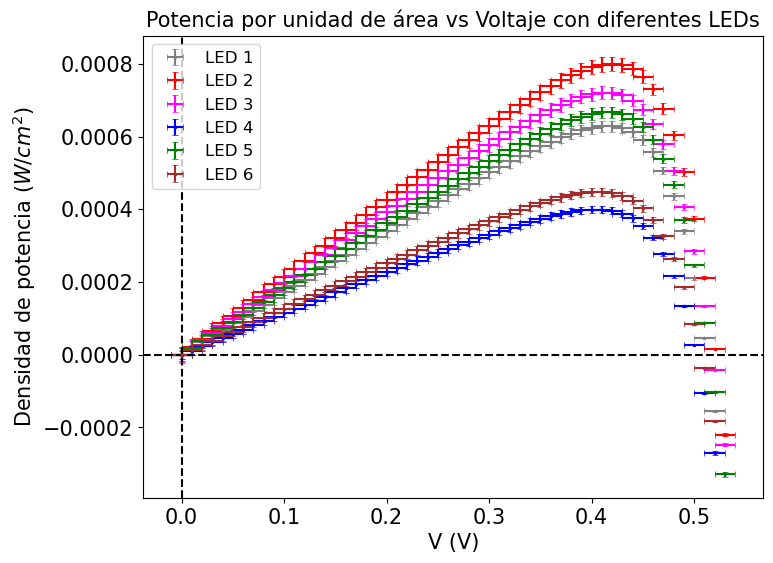

In [20]:

# Calcular la potencia como el producto de I1 y V1 para los datos filtrados
""" df_filtrado_V.loc[:,'Potencia'] = df_filtrado_V['-I1'] * df_filtrado_V['V1']
df_filtrado_DIV.loc[:,'Potencia'] = df_filtrado_DIV['-I1'] * df_filtrado_DIV['V1']
df_filtrado_M.loc[:,'Potencia'] = df_filtrado_M['-I1'] * df_filtrado_M['V1']
df_filtrado_R.loc[:,'Potencia'] = df_filtrado_R['-I1'] * df_filtrado_R['V1']
df_filtrado_B.loc[:,'Potencia'] = df_filtrado_B['-I1'] * df_filtrado_B['V1']
df_filtrado_A.loc[:,'Potencia'] = df_filtrado_A['-I1'] * df_filtrado_A['V1']
df_filtrado_Ir.loc[:,'Potencia'] = df_filtrado_Ir['-I1'] * df_filtrado_Ir['V1'] """

df_filtrado_V.loc[:,'Potencia'] = -df_filtrado_V['J(A/cm2)'] * df_filtrado_V['V1']
df_filtrado_DIV.loc[:,'Potencia'] = -df_filtrado_DIV['J(A/cm2)'] * df_filtrado_DIV['V1']
df_filtrado_M.loc[:,'Potencia'] = -df_filtrado_M['J(A/cm2)'] * df_filtrado_M['V1']
df_filtrado_R.loc[:,'Potencia'] = -df_filtrado_R['J(A/cm2)'] * df_filtrado_R['V1']
df_filtrado_B.loc[:,'Potencia'] = -df_filtrado_B['J(A/cm2)'] * df_filtrado_B['V1']
df_filtrado_A.loc[:,'Potencia'] = -df_filtrado_A['J(A/cm2)'] * df_filtrado_A['V1']
df_filtrado_Ir.loc[:,'Potencia'] = -df_filtrado_Ir['J(A/cm2)'] * df_filtrado_Ir['V1']

# Errores
errP_B = abs(errV * df_filtrado_B['J(A/cm2)'])+abs(errI * df_filtrado_B['V1'])
errP_R =abs( errV * df_filtrado_R['J(A/cm2)'])+abs(errI * df_filtrado_R['V1'])
errP_A = abs(errV * df_filtrado_A['J(A/cm2)'])+abs(errI * df_filtrado_A['V1'])
errP_V=abs( errV * df_filtrado_V['J(A/cm2)'])+abs(errI * df_filtrado_V['V1'])
errP_M = abs(errV * df_filtrado_M['J(A/cm2)'])+abs(errI * df_filtrado_M['V1'])
errP_Ir = abs(errV * df_filtrado_Ir['J(A/cm2)'])+abs(errI * df_filtrado_Ir['V1'])

# Crear la figura y la gráfica
plt.figure(figsize=(8, 6))
#plt.errorbar(df_filtrado_DIV['V1'], df_filtrado_DIV['Potencia'],xerr=errV,yerr=errI, marker='o',markersize = 3, linestyle='-', color='k')
plt.errorbar(df_filtrado_B['V1'], df_filtrado_B['Potencia'],xerr=errV,yerr=errP_B, marker='.', markersize = 3, linestyle=' ', color='gray', capsize=2, capthick=0.5,label='LED 1')
plt.errorbar(df_filtrado_R['V1'], df_filtrado_R['Potencia'],xerr=errV,yerr=errP_R, marker='.', markersize = 3, linestyle=' ', color='red', capsize=2, capthick=0.5 ,label='LED 2')
plt.errorbar(df_filtrado_M['V1'], df_filtrado_M['Potencia'],xerr=errV,yerr=errP_M, marker='.', markersize = 3, linestyle=' ', color='magenta', capsize=2, capthick=0.5,label='LED 3')
plt.errorbar(df_filtrado_A['V1'], df_filtrado_A['Potencia'],xerr=errV,yerr=errP_A, marker='.', markersize = 3,linestyle=' ', color='blue', capsize=2, capthick=0.5,label='LED 4')
plt.errorbar(df_filtrado_V['V1'], df_filtrado_V['Potencia'],xerr=errV,yerr=errP_V, marker='.', markersize = 3,linestyle=' ', color='green', capsize=2, capthick=0.5,label='LED 5')

plt.errorbar(df_filtrado_Ir['V1'], df_filtrado_Ir['Potencia'],xerr=errV,yerr=errP_Ir, marker='.', markersize = 3,linestyle=' ', color='brown', capsize=2, capthick=0.5,label= 'LED 6')

# Configuración de los ejes
plt.xlabel('V (V)',fontsize = 15)
plt.ylabel(r'Densidad de potencia ($W/cm^2$)',fontsize = 15)
plt.title(r'Potencia por unidad de área vs Voltaje con diferentes LEDs',fontsize=15)
# plt.grid(True, which="both", ls="--")  # Cuadrícula para facilitar la lectura


plt.axhline(0, color='k', ls = '--')
plt.axvline(0, color='k', ls = '--')

# Mostrar la gráfica
plt.legend(loc = 'upper left',fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()


## Calculamos la eficiencia para cada LED

In [21]:
def calcular_eficiencia(df,potencia_suminnistrada):
    """
    Calcula la potencia máxima y la eficiencia para un DataFrame filtrado.
    
    Parámetros:
        df (DataFrame): El DataFrame filtrado con columna 'Potencia'.
        potencia_suministrada (float): La potencia suministrada en mW.
    
    Retorna:
        tuple: Potencia máxima y eficiencia.
    """
    pot_max = (df['Potencia']).max()
    eficiencia = pot_max/potencia_suminnistrada
    return pot_max,eficiencia

In [22]:
pot_sum = 0.1
err_pot_sum_sol = 0.005

potencia_max_sol,efic_sol = calcular_eficiencia(df_filt_sol,pot_sum)

In [23]:
efic_sol

0.149868197955

In [24]:

df_filt_sol_filt = df_filt_sol[df_filt_sol['Potencia']==potencia_max_sol]
err_pot = abs(errV_sol * df_filt_sol_filt['I1'].iloc[0])+abs(errI_sol * df_filt_sol_filt['V1'].iloc[0])
err_ef = err_pot/pot_sum + potencia_max_sol*err_pot_sum_sol/(pot_sum**2)

In [25]:
err_ef

0.00798374952775

In [26]:
# Diccionarios con los df
datasets_df = {
    'LED 4': df_filtrado_A,
    
    'LED 1': df_filtrado_B,
    'LED 5': df_filtrado_V,
    'LED 3': df_filtrado_M,
    'LED 2': df_filtrado_R,
    'LED 6': df_filtrado_Ir
}

# Diccionario de colores
colores_led = {
    'LED 4': 'blue',

    'LED 1': 'gray',
    'LED 5': 'green',
    'LED 3': 'magenta',
    'LED 2': 'red',
    'LED 6':'brown'
}

In [27]:
0.02/area_cell

0.005

In [28]:
0.0066/(np.pi*(1.15/2)**2)

0.0063541633234420235

In [29]:
# Usamos la funcion para calcular la potencia maxima y la eficiencia

# Intorducimos la potencia suministrada por el LED

potencia_suministrada = 0.0066/(np.pi*(1.15/2)**2)
err_pot_sum = 0.001/(np.pi*(1.15/2)**2)

# Diccionario para resultados
resultados_ef = {}

for key, df in datasets_df.items():
    pot_max, eficiencia = calcular_eficiencia(df,potencia_suministrada)
    df_filt = df[df['Potencia']==pot_max]
    err_pot = abs(errV * df_filt['I1'].iloc[0])+abs(errI * df_filt['V1'].iloc[0])
    err_ef = err_pot/potencia_suministrada + pot_max*err_pot_sum/(potencia_suministrada**2)

    # err_ef = eficiencia*np.sqrt((err_pot/pot_max)**2+(err_pot_sum/potencia_suministrada)**2)
    
    resultados_ef[key] = {
        'Potencia máxima (mW)': pot_max,
        'Eficiencia': int(eficiencia*100),
        'Error Potencia': err_pot,
        'Error Eficiencia': err_ef
    }



# Calculamos la potencia máxima
pot_max_B, eficiencia_B,err_ef_B = resultados_ef['LED 1']['Potencia máxima (mW)'], resultados_ef['LED 1']['Eficiencia'], resultados_ef['LED 1']['Error Eficiencia']
pot_max_V, eficiencia_V,err_ef_V = resultados_ef['LED 5']['Potencia máxima (mW)'], resultados_ef['LED 5']['Eficiencia'], resultados_ef['LED 5']['Error Eficiencia']
pot_max_M, eficiencia_M,err_ef_M = resultados_ef['LED 3']['Potencia máxima (mW)'], resultados_ef['LED 3']['Eficiencia'], resultados_ef['LED 3']['Error Eficiencia']
pot_max_A, eficiencia_A,err_ef_A = resultados_ef['LED 4']['Potencia máxima (mW)'], resultados_ef['LED 4']['Eficiencia'], resultados_ef['LED 4']['Error Eficiencia']
pot_max_R, eficiencia_R,err_ef_R = resultados_ef['LED 2']['Potencia máxima (mW)'], resultados_ef['LED 2']['Eficiencia'], resultados_ef['LED 2']['Error Eficiencia']
#pot_max_D, eficiencia_D = resultados_ef['D']['Potencia máxima (mW)'], resultados_ef['D']['Eficiencia']
pot_max_Ir, eficiencia_Ir,err_ef_Ir = resultados_ef['LED 6']['Potencia máxima (mW)'], resultados_ef['LED 6']['Eficiencia'], resultados_ef['LED 6']['Error Eficiencia']



Representamos la eficiencia frente a la longitud de onda

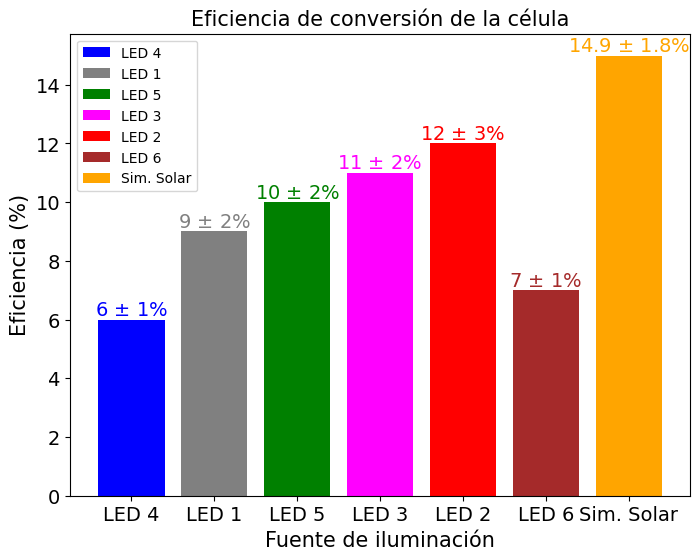

In [30]:


for key, res in resultados_ef.items():
    plt.figure(1,figsize=(8,6))
    color_led = colores_led.get(key,'k')
    plt.bar(key,res['Eficiencia'], color = color_led, label=f'{key}')

    plt.text(key, res['Eficiencia'],rf"{int(res['Eficiencia'])} $\pm$ {int(res['Error Eficiencia']*100)}%", fontsize=14, color=color_led, ha='center', va='bottom')
    if key == 'LED 6':
        plt.bar('Sim. Solar',efic_sol*100, color = 'orange',label='Sim. Solar')
        plt.text('Sim. Solar', efic_sol*100,rf"{'14.9'} $\pm$ {round(err_ef*100,1)}%", fontsize=14, color='orange', ha='center', va='bottom')

    plt.xlabel('Fuente de iluminación',fontsize = 15)
    plt.title(r'Eficiencia de conversión de la célula',fontsize=15)
    plt.ylabel('Eficiencia (%)', fontsize = 15)
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=14)


plt.show()

## Calculamos el factor de llenado

In [31]:
df_filt_sol_1[df_filt_sol_1['V1']==0]

,V1,I1,J(A/cm2),dV,Potencia


In [32]:
def calcular_ff(df_filtrado, potencia_max):
    """
    Calcula I_max, V_max, I_sc, V_oc y el Fill Factor (FF) para un DataFrame filtrado.
    Realiza interpolación lineal para calcular V_oc cuando I1_abs no corta exactamente en 0.
    """
    # Filtrar P_max
    df_Pmax = df_filtrado[df_filtrado['Potencia'] == potencia_max]

    # Calcular I_max y V_max
    I_max = df_Pmax['I1_abs'].iloc[0] if not df_Pmax.empty else None
    V_max = df_Pmax['V1'].iloc[0] if not df_Pmax.empty else None
    
    # Calcular I_sc
    I_sc = df_filtrado[df_filtrado['V1'] == 0]['I1_abs'].iloc[0] if not df_filtrado[df_filtrado['V1'] == 0].empty else None

    # Calcular V_oc con interpolación lineal
    if (df_filtrado['-I1'] > 0).any() and (df_filtrado['-I1'] < 0).any():
        # Filtrar los dos puntos más cercanos a I = 0
        df_filtrado = df_filtrado.sort_values(by='-I1')
        punto_negativo = df_filtrado[df_filtrado['-I1'] < 0].iloc[-1]  # Último punto con I < 0
        punto_positivo = df_filtrado[df_filtrado['-I1'] > 0].iloc[0]  # Primer punto con I > 0

        # Coordenadas de los puntos
        I1, V1 = punto_negativo['-I1'], punto_negativo['V1']
        I2, V2 = punto_positivo['-I1'], punto_positivo['V1']

        # Fórmula de interpolación lineal: V_oc = V1 - I1 * (V2 - V1) / (I2 - I1)
        V_oc = V1 - I1 * (V2 - V1) / (I2 - I1)
    else:
        # Si no hay datos suficientes para interpolar, no se puede calcular V_oc
        V_oc = None
   
    # Calcular FF si todos los valores son válidos
    if I_max is not None and V_max is not None and I_sc is not None and V_oc is not None:
        FF = (I_max * V_max) / (I_sc * V_oc)
    else:
        FF = None  # Indicar que no se pudo calcular

    return I_max, V_max, I_sc, V_oc, FF


In [33]:
# Aplicar la función a cada conjunto de datos
resultados_ff = {}
datasets_ff = {
    'LED 4': (df_filtrado_A, pot_max_A),
    'LED 6': (df_filtrado_Ir,pot_max_Ir),
    'LED 1': (df_filtrado_B, pot_max_B),
    'LED 5': (df_filtrado_V, pot_max_V),
    'LED 3': (df_filtrado_M, pot_max_M),
    'LED 2': (df_filtrado_R, pot_max_R)
}

for key, (df, pot_max) in datasets_ff.items():
    I_max, V_max, I_sc, V_oc, FF = calcular_ff(df,pot_max)
    errFF = np.sqrt((V_max / (I_sc * V_oc) * errI)**2 + (I_max / (I_sc * V_oc) * errV)**2 + (-I_max * V_max / (I_sc**2 * V_oc) * errI)**2 + (-I_max * V_max / (I_sc * V_oc**2) * errV)**2)
    resultados_ff[key] = {
        'I_max': I_max,
        'V_max': V_max,
        'I_sc': I_sc,
        'V_oc': V_oc,
        'FF': FF,
        'Error FF': errFF 
    }


# Mostrar los resultados_ff
for key, res in resultados_ff.items():
    if all(val is not None for val in res.values()):
        print(f"{key}: I_max={res['I_max']:.4e}, V_max={res['V_max']:.4e}, I_sc={res['I_sc']:.4e}, V_oc={res['V_oc']:.4e}, FF={res['FF']:.4e}, ErrFF = {res['Error FF']:4e}")
    else:
        print(f"{key}: No se pudo calcular el FF debido a datos insuficientes.")

# Desempaquetar los resultados_ff en variables individuales para cada conjunto
(I_max_V, V_max_V, I_sc_V, V_oc_V, FF_V,errF_V) = resultados_ff['LED 5'].values()
(I_max_B, V_max_B, I_sc_B, V_oc_B, FF_B,errF_B) = resultados_ff['LED 1'].values()
(I_max_R, V_max_R, I_sc_R, V_oc_R, FF_R,errF_R) = resultados_ff['LED 2'].values()
(I_max_A, V_max_A, I_sc_A, V_oc_A, FF_A,errF_A) = resultados_ff['LED 4'].values()
(I_max_M, V_max_M, I_sc_M, V_oc_M, FF_M,errF_M) = resultados_ff['LED 3'].values()
(I_max_Ir, V_max_Ir, I_sc_Ir, V_oc_Ir, FF_Ir,errF_Ir) = resultados_ff['LED 6'].values()


LED 4: I_max=3.8950e-03, V_max=4.1000e-01, I_sc=4.6270e-03, V_oc=5.0207e-01, FF=6.8743e-01, ErrFF = 2.164680e-02
LED 6: I_max=4.3645e-03, V_max=4.1000e-01, I_sc=5.1091e-03, V_oc=5.0700e-01, FF=6.9082e-01, ErrFF = 2.166903e-02
LED 1: I_max=5.9822e-03, V_max=4.2000e-01, I_sc=6.9151e-03, V_oc=5.1237e-01, FF=7.0913e-01, ErrFF = 2.183178e-02
LED 5: I_max=6.3455e-03, V_max=4.2000e-01, I_sc=7.3206e-03, V_oc=5.1466e-01, FF=7.0738e-01, ErrFF = 2.173883e-02
LED 3: I_max=7.0286e-03, V_max=4.1000e-01, I_sc=7.9269e-03, V_oc=5.1769e-01, FF=7.0223e-01, ErrFF = 2.184836e-02
LED 2: I_max=7.6220e-03, V_max=4.2000e-01, I_sc=8.6241e-03, V_oc=5.2071e-01, FF=7.1287e-01, ErrFF = 2.180608e-02


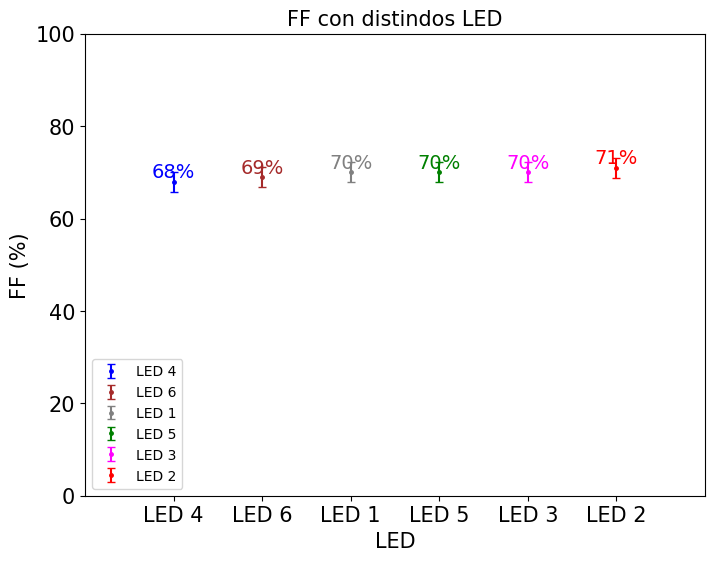

In [34]:
# Represenntamos el FF para los diferentes LEDs
for key, res in resultados_ff.items():
    res['FF'] = res['FF']
    if res['FF'] is not None:
        plt.figure(1,figsize=(8,6))
        color_led = colores_led.get(key,'k')
        # plt.bar(key,int(res['FF']*100), color = color_led, label=f'{key}')
        plt.errorbar(key,int(res['FF']*100),yerr=res['Error FF']*100,marker='.', markersize = 5, capsize=3, capthick=1, color = color_led,linestyle = ' ', label=f'{key}')
        plt.text(key, int(res['FF']*100),rf"{int(res['FF']*100)}%", fontsize=14, color=color_led, ha='center', va='bottom')
        plt.title(r'FF con distindos LED',fontsize = 15)
        plt.xlabel('LED',fontsize = 15)
        plt.ylabel('FF (%)',fontsize = 15)
        plt.legend()
        plt.tick_params(axis='both', which='major', labelsize=15)
        # plt.tight_layout()
        plt.axis([-1,6,0,100])


plt.show()

### Fill Factor para el simulador solar

In [35]:
def calcular_ff_sol(df_filtrado, potencia_max):
    """
    Calcula I_max, V_max, I_sc, V_oc y el Fill Factor (FF) para un DataFrame filtrado.
    Realiza interpolación lineal para calcular V_oc (cuando I ≈ 0) y I_sc (cuando V ≈ 0),
    si no existen exactamente esos puntos en los datos.
    """
    # Filtrar P_max
    df_Pmax = df_filtrado[df_filtrado['Potencia'] == potencia_max]
    I_max = df_Pmax['I1_abs'].iloc[0] if not df_Pmax.empty else None
    V_max = df_Pmax['V1'].iloc[0] if not df_Pmax.empty else None

    # Calcular I_sc: Interpolación lineal si V=0 no está exactamente
    if (df_filtrado['V1'] > 0).any() and (df_filtrado['V1'] < 0).any():
        df_ordenado = df_filtrado.sort_values(by='V1')
        punto_neg = df_ordenado[df_ordenado['V1'] < 0].iloc[-1]
        punto_pos = df_ordenado[df_ordenado['V1'] > 0].iloc[0]

        V1, I1 = punto_neg['V1'], punto_neg['I1_abs']
        V2, I2 = punto_pos['V1'], punto_pos['I1_abs']

        # Interpolación para I_sc (I cuando V = 0)
        I_sc = I1 + (0 - V1) * (I2 - I1) / (V2 - V1)
    else:
        I_sc = None

    # Calcular V_oc: Interpolación lineal si I=0 no está exactamente
    if (df_filtrado['-I1'] > 0).any() and (df_filtrado['-I1'] < 0).any():
        df_ordenado = df_filtrado.sort_values(by='-I1')
        punto_neg = df_ordenado[df_ordenado['-I1'] < 0].iloc[-1]
        punto_pos = df_ordenado[df_ordenado['-I1'] > 0].iloc[0]

        I1, V1 = punto_neg['-I1'], punto_neg['V1']
        I2, V2 = punto_pos['-I1'], punto_pos['V1']

        # Interpolación para V_oc (V cuando I = 0)
        V_oc = V1 + (0 - I1) * (V2 - V1) / (I2 - I1)
    else:
        V_oc = None

    # Calcular FF
    if I_max is not None and V_max is not None and I_sc is not None and V_oc is not None:
        FF = (I_max * V_max) / (I_sc * V_oc)
    else:
        FF = None

    return I_max, V_max, I_sc, V_oc, FF


In [36]:
df_filt_sol_1['I1_abs'] =  np.abs(df_filt_sol_1['I1'])
df_filt_sol_1['-I1'] = -df_filt_sol_1['I1']

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2650735647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_sol_1['I1_abs'] =  np.abs(df_filt_sol_1['I1'])
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2650735647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_sol_1['-I1'] = -df_filt_sol_1['I1']


In [37]:
I_max_sol, V_max_sol, I_sc_sol, V_oc_sol, FF_sol = calcular_ff_sol(df_filt_sol_1,potencia_max_sol)
errFF_sol = np.sqrt((V_max_sol / (I_sc_sol * V_oc_sol) * errI_sol)**2 + (I_max_sol / (I_sc_sol * V_oc_sol) * errV_sol)**2 + (-I_max_sol * V_max_sol / (I_sc_sol**2 * V_oc_sol) * errI_sol)**2 + (-I_max_sol * V_max_sol / (I_sc_sol * V_oc_sol**2) * errV_sol)**2)

In [38]:
FF_sol

0.7789365445888281

In [39]:
errFF_sol

0.0008709090869593496

## Respuesta espectral y QE

In [40]:
landas = {
    'LED 4': 454,
    
    'LED 1': 489,
    'LED 5': 528,
    'LED 3': 567,
    'LED 2': 646,
    'LED 6': 949
}

err_landas ={
    'LED 4': 13,
    'LED 1': 28,
    'LED 5': 28,
    'LED 3': 32,
    'LED 2': 33,
    'LED 6': 50 
}

In [41]:
def calcular_SR(df,pot_inc):
    pot_max = df['Potencia'].max()
    df_max = df[df['Potencia']==pot_max]
    SR =df_max['-I1']/pot_inc
    return SR

In [42]:
def calcular_error_SR(SR,P, err_I, err_P):
    I = float(SR)*P
    if I != 0 and P != 0:
        err_SR = SR * np.sqrt((err_I / I)**2 + (err_P / P)**2)
    else:
        err_SR = np.nan  # o 0, dependiendo del caso
    return err_SR


In [43]:
# Inicialización de resultados
resultados_SR = {}

pot = (0.0066 / (np.pi * (1.15 / 2)**2)) * 4  # Potencia corregida
err_P = 0.001
err_I = errI
# Listas para almacenar resultados
leds = []
SRs = []
colores_plot = []

# Recorrido por cada dataset
for key, df in datasets_df.items():
    SR = calcular_SR(df, pot)
    resultados_SR[key] = SR
    
    leds.append(key)
    SRs.append(SR)
    colores_plot.append(colores_led.get(key, 'k'))


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_18208\2066252286.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  I = float(SR)*P


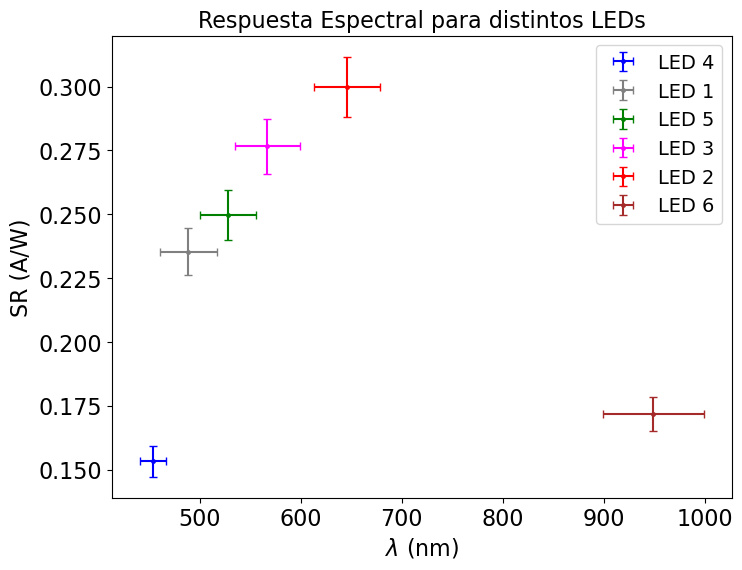

In [44]:

# Representación
errores_SR = {}

for key, res in resultados_SR.items():
    err_SR = calcular_error_SR(res,pot,err_I,err_P)
    errores_SR[key] = err_SR
    plt.figure(1,figsize=(8,6))
    color_led = colores_led.get(key,'k')
    plt.errorbar(landas[key],res,xerr=err_landas[key],yerr=err_SR,marker='.', markersize = 5, capsize=3, capthick=1, color = color_led,linestyle = ' ', label=f'{key}')
    plt.title(r'Respuesta Espectral para distintos LEDs',fontsize = 16)
    plt.xlabel(r'$\lambda$ (nm)',fontsize = 16)
    plt.ylabel('SR (A/W)',fontsize = 16)
    plt.legend(loc='best', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=16)


plt.show()


In [45]:
def eficiencia_cuantica(l,SR):
    hc = 1.98e-25
    q = 1.6e-19
    # q_ef = (hc/(q*l))*SR
    q_ef = 1240*SR/l
    return q_ef

In [46]:
def eficiencia_cuantica(l, SR, delta_SR, delta_l):
    hc = 1.98e-25
    q = 1.6e-19
    
    # Cálculo de la eficiencia cuántica
    q_ef = 1240 * SR / l
    
    # Propagación de errores
    # Derivadas parciales de q_ef con respecto a SR y l
    d_qef_d_SR = 1240 / l
    d_qef_d_l = -1240 * SR / l**2
    
    # Error de q_ef
    delta_q_ef = np.sqrt((d_qef_d_SR * delta_SR)**2 + (d_qef_d_l * delta_l)**2)
    
    return q_ef, delta_q_ef

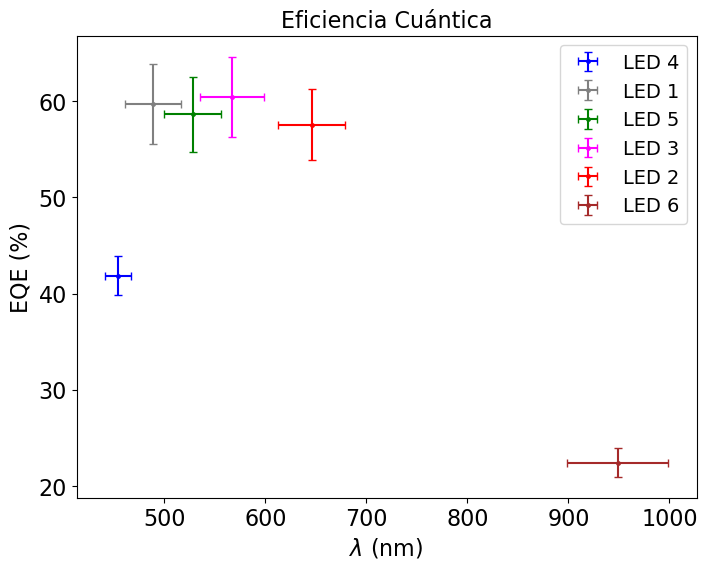

In [47]:
resultados_qef = {}
errores_qef = {}

for key, landa in landas.items():
    qef,err_qef = eficiencia_cuantica(landa,resultados_SR[key], errores_SR[key],err_landas[key])
    
    resultados_qef[key] =  qef
    errores_qef[key] = err_qef
    plt.figure(1,figsize=(8,6))
    color_led = colores_led.get(key,'k')
    plt.errorbar(landa,qef*100,xerr=err_landas[key],yerr=errores_qef[key]*100,marker='.', markersize = 5, capsize=3, capthick=1, color = color_led,linestyle = ' ', label=f'{key}')
    plt.title(r'Eficiencia Cuántica',fontsize = 16)
    plt.xlabel(r'$\lambda$ (nm)',fontsize = 16)
    plt.ylabel('EQE (%)',fontsize = 16)
    plt.legend(loc='best', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=16)